<a href="https://colab.research.google.com/github/jiruneko/supportvector/blob/main/supportvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
np.random.seed(123)
df1 = pd.DataFrame({"x": np.random.uniform(size=50), "y": np.random.uniform(size=50), "target":np.repeat(0, 50)})
df2 = pd.DataFrame({"x": np.random.uniform(-1, 0, size=50), "y": np.random.uniform(-1, 0, size=50), "target":np.repeat(1,50)})
df = pd.concat([df1, df2], ignore_index=True)
df

,x,y,target
0,0.696469,0.120629,0
1,0.286139,0.826341,0
2,0.226851,0.603060,0
3,0.551315,0.545068,0
4,0.719469,0.342764,0
...,...,...,...
95,-0.246474,-0.364100,1
96,-0.258138,-0.967802,1
97,-0.951421,-0.255219,1
98,-0.291303,-0.527087,1


In [3]:
data0 = df.query('target == 0').loc[:, ["x", "y"]].values
target0 = df.query('target == 0').loc[:, "target"].values
data1 = df.query('target == 1').loc[:, ["x", "y"]].values
target1 = df.query('target == 1').loc[:, "target"].values

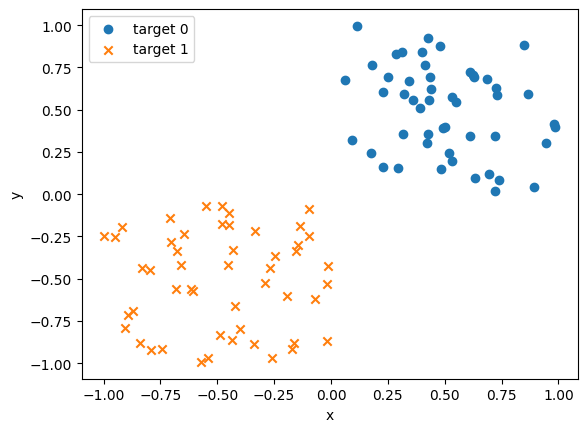

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [5]:
from sklearn.svm import SVC

In [6]:
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
  svc = SVC(kernel=kernel, C=C)
  svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))

  fig, ax = plt.subplots()
  ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
  ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')

  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
  xy = np.vstack([xx.ravel(), yy.ravel()]).T
  p = svc.decision_function(xy).reshape((100, 100))
  ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
  ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red')

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc='best')
  plt.show()

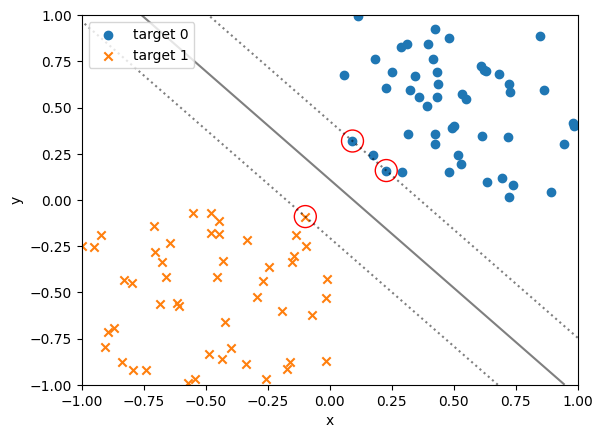

In [7]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=1e6)

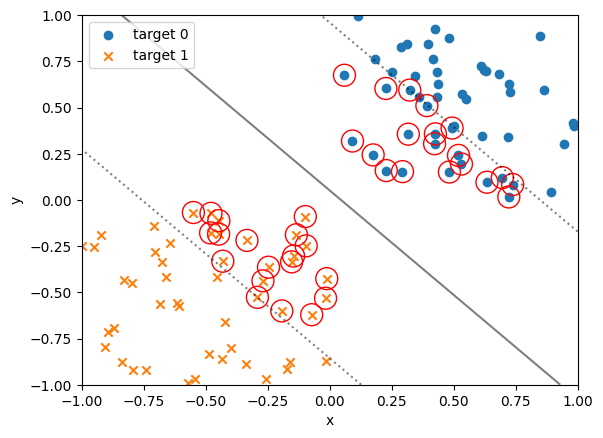

In [8]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=0.1)

In [9]:
np.random.seed(123)
data = np.random.uniform(size=(50, 2))
target = (data[:, 1] > 2*(data[:, 0]-0.5)**2 + 0.5).astype(int)

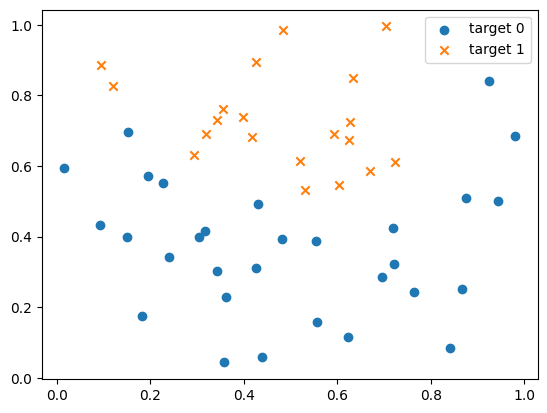

In [10]:
fig, ax = plt.subplots()
ax.scatter(data[target == 0, 0], data[target == 0, 1], marker="o", label='target 0') # <-- 1
ax.scatter(data[target == 1, 0], data[target == 1, 1], marker="x", label='target 1') # <-- 2
ax.legend()
plt.show()

In [11]:
data0, data1 = data[target == 0, :], data[target == 1, :]
target0, target1 = target[target == 0], target[target == 1]

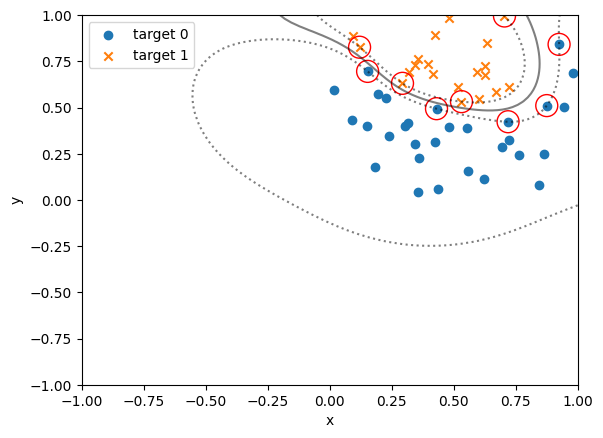

In [13]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6)

In [21]:
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
  svc = SVC(kernel=kernel, C=C)  # <-- 1
  svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- 2
  # 3
  fig, ax = plt.subplots()
  ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
  ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
  # 4
  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
  xy = np.vstack([xx.ravel(), yy.ravel()]).T
  p = svc.decision_function(xy).reshape((100, 100))
  ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
  ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red') # <-- 5

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc='best')
  plt.show()

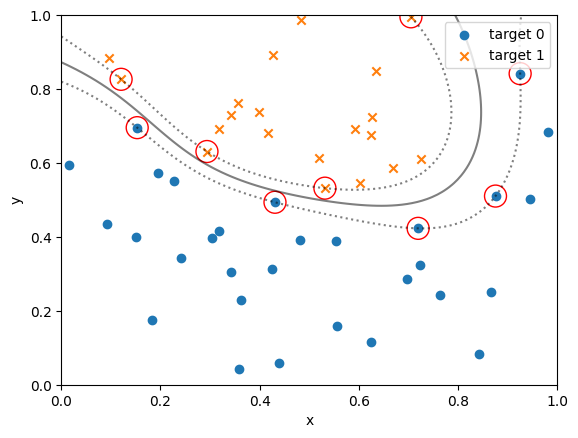

In [22]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6, xmin=0, ymin=0)